In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = "NJ-12 Monmouth County.csv"
pafile = "PAETL.csv"

In [5]:
file_df = pd.read_csv(file)
pafile_df = pd.read_csv(pafile)

In [6]:
cityarray = file_df['CITY']
#cityarray

In [7]:
pafile_df.head()

,ID,Name,Date Created,Date Modified,NCA Chain,Invoice #,Invoice Date,Month,Gross,Currency,Net,Discount %,Rebate %,Rebate Amount,Customer,NCA Group
0,1018364,425-5643,9/6/2018,9/17/2018,Sodexo,425-5643,9/1/2018,September,225.0,NaN,191.25,15.0,10.0,22.5,NCC - Food Court 2,Sodexo
1,1018365,425-5644,9/6/2018,9/17/2018,Sodexo,425-5644,9/1/2018,September,240.0,NaN,204.00,15.0,10.0,24.0,Moravian College (Blue & Grey),Sodexo
2,1018366,425-5645,9/6/2018,9/17/2018,Sodexo,425-5645,9/1/2018,September,195.0,NaN,165.75,15.0,10.0,19.5,Lehigh Valley Muhlenberg Hospital,Sodexo
3,1018367,425-5648,9/6/2018,9/17/2018,Sodexo,425-5648,9/1/2018,September,240.0,NaN,204.00,15.0,10.0,24.0,Muhlenberg University food ct,Sodexo
4,1018368,425-5649,9/6/2018,10/22/2018,ARA,425-5649,9/1/2018,September,60.0,-99.0,51.00,15.0,10.0,6.0,Aramark Chubb CPI (Bldg A) - Whitehouse,Aramark


In [8]:
cleanPA_df = pafile_df[["NCA Chain", "Customer", "Gross", "Net", "Rebate Amount", "Invoice Date","Month"]]

In [9]:
cleanPA_df.head(10)

,NCA Chain,Customer,Gross,Net,Rebate Amount,Invoice Date,Month
0,Sodexo,NCC - Food Court 2,225.0,191.25,22.5,9/1/2018,September
1,Sodexo,Moravian College (Blue & Grey),240.0,204.00,24.0,9/1/2018,September
2,Sodexo,Lehigh Valley Muhlenberg Hospital,195.0,165.75,19.5,9/1/2018,September
3,Sodexo,Muhlenberg University food ct,240.0,204.00,24.0,9/1/2018,September
4,ARA,Aramark Chubb CPI (Bldg A) - Whitehouse,60.0,51.00,6.0,9/1/2018,September
5,ARA,Aramark Chubb CCI (Bldg B) - Whitehouse,116.0,98.60,11.6,9/1/2018,September
6,Sodexo,Lehigh Valley Hospital - Cedar Crest,150.0,127.50,15.0,9/1/2018,September
7,Sodexo,Moravian College (Kitchen),120.0,102.00,12.0,9/1/2018,September
8,Sodexo,Muhlenberg University GQ,120.0,102.00,12.0,9/1/2018,September
9,Sodexo,DeSales University,180.0,153.00,18.0,9/1/2018,September


In [10]:
#file_df.count()
#file_df["ACTUAL SALES VOLUME"].mean()
cleanPA_df["Customer"].nunique()

38

In [11]:
Monthunique = cleanPA_df["Month"].nunique()

In [12]:
#file_df.dtypes

In [13]:
cleanPA_df.dtypes

NCA Chain         object
Customer          object
Gross            float64
Net              float64
Rebate Amount    float64
Invoice Date      object
Month             object
dtype: object

In [14]:
#cleanPA_df["Net"] = pd.to_numeric(cleanPA_df["Net"],errors='coerce')
#cleanPA_df["Gross"] = pd.to_numeric(cleanPA_df["Gross"],errors = 'coerce')
#cleanPA_df[cleanPA_df.columns[2:5]].replace('[\$,]','',regex=True).astype(float)

In [15]:
#cleanPA_df["Net"] = cleanPA_df["Net"].astype(str).astype(float)
#cleanPA_df["Rebate Amount"] = cleanPA_df["Rebate Amount"].astype(str).astype(float)
#cleanPA_df["Gross"] = cleanPA_df["Gross"].astype(str).astype(float)

In [16]:
#cleanPA_df.dtypes

In [17]:
#file_df["ACTUAL SALES VOLUME"].min()
totalGross = cleanPA_df["Gross"].sum()

In [18]:
totalNet = cleanPA_df["Net"].sum()

In [19]:
avgNet = cleanPA_df["Net"].mean()

In [20]:
totalGross

42091.56

In [21]:
Netwithnonca = totalNet + 10918.06

In [22]:
Netwithnonca


37436.53999999999

In [23]:
Netwithnonca/totalGross

0.8894072826001221

In [24]:
cleanPA_df["Invoice Date"].unique()

array(['9/1/2018', '9/6/2018', '9/7/2018', '9/8/2018', '9/13/2018',
       '9/14/2018', '9/15/2018', '9/20/2018', '9/21/2018', '9/22/2018',
       '9/27/2018', '9/29/2018', '9/30/2018', '10/4/2018', '10/6/2018',
       '10/11/2018', '10/13/2018', '10/18/2018', '10/20/2018',
       '10/23/2018', '10/25/2018', '10/27/2018', '10/29/2018',
       '10/31/2018'], dtype=object)

In [25]:
Septnetrev = cleanPA_df.loc[cleanPA_df["Month"] == "September",:]

In [26]:
Octnetrev = cleanPA_df.loc[cleanPA_df["Month"] == "October",:]

In [27]:
Octnetrev.head()

,NCA Chain,Customer,Gross,Net,Rebate Amount,Invoice Date,Month
130,Sodexo,Lehigh Univ. (Hawks Nest),168.0,142.80,16.8,10/4/2018,October
131,Sodexo,Lehigh Univ. (UC1-Kitchen/Grill),135.0,114.75,13.5,10/4/2018,October
132,Sodexo,TCNJ - TRADITIONS,192.0,163.20,19.2,10/4/2018,October
133,Sodexo,TCNJ - TDUBS,256.0,217.60,25.6,10/4/2018,October
134,Sodexo,TCNJ - FOOD COURT,160.0,136.00,16.0,10/4/2018,October


In [28]:
NCAgroup = cleanPA_df.groupby(["NCA Chain"])

In [29]:
Monthgroup = cleanPA_df.groupby(["Month"])

In [30]:
NCAgroup["Gross"].sum()

NCA Chain
ARA        1920.0
SGE         210.0
Sodexo    29043.5
Name: Gross, dtype: float64

In [69]:
twogroup = NCAgroup["Net"].sum()

In [70]:
twogroup

NCA Chain
ARA        1632.00
SGE         199.50
Sodexo    24686.98
Name: Net, dtype: float64

In [71]:
mgroup = NCAgroup["Month"].nunique()

In [72]:
mgroup

NCA Chain
ARA       2
SGE       2
Sodexo    2
Name: Month, dtype: int64

In [73]:
x_axis = np.arange(len(mgroup))
tick_locations = [value for value in x_axis]

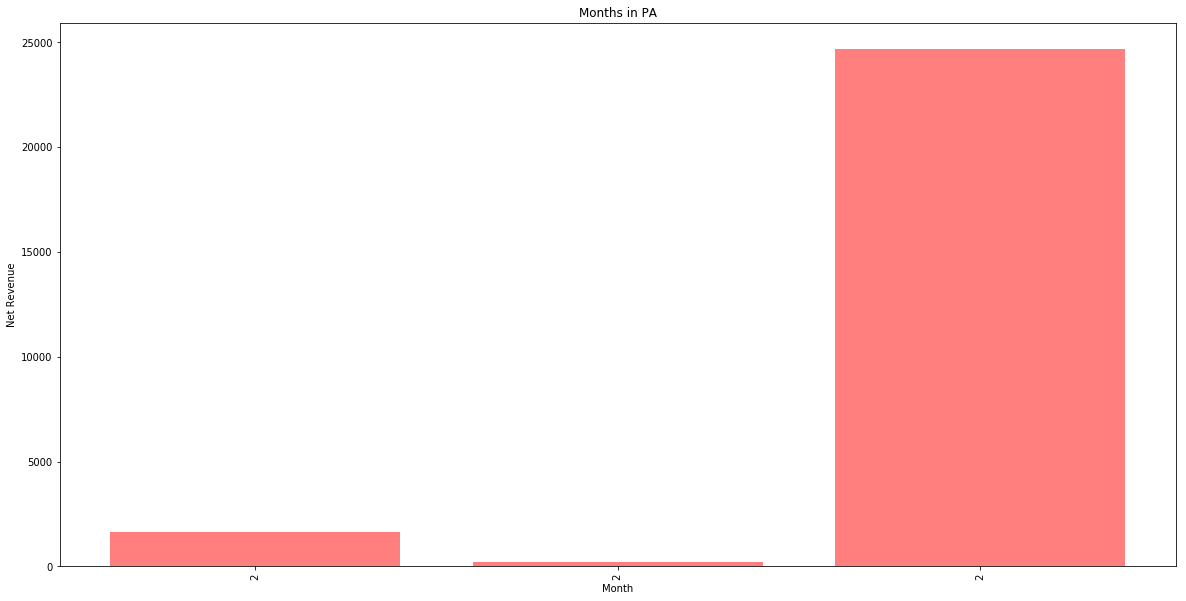

In [74]:
plt.figure(figsize=(20,10))
plt.bar(x_axis, twogroup, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, mgroup, rotation="vertical")

plt.title("Months in PA")
plt.xlabel("Month")
plt.ylabel("Net Revenue")
#plt.tight_lay
plt.savefig("NCARev.png")
plt.show()

In [43]:
groupNet = Monthgroup["Net"].sum()

In [44]:
groupNet

Month
October      12600.60
September    13917.88
Name: Net, dtype: float64

In [59]:
countgroup = Monthgroup["Net"].sum()

In [60]:
countgroup

Month
October      12600.60
September    13917.88
Name: Net, dtype: float64

In [45]:
Monthgroup.sum()

,Gross,Net,Rebate Amount
Month,,,
October,19574.75,12600.60,1474.60
September,22516.81,13917.88,1621.75


In [65]:
x_axis = np.arange(len(Monthgroup))
tick_locations = [value for value in x_axis]

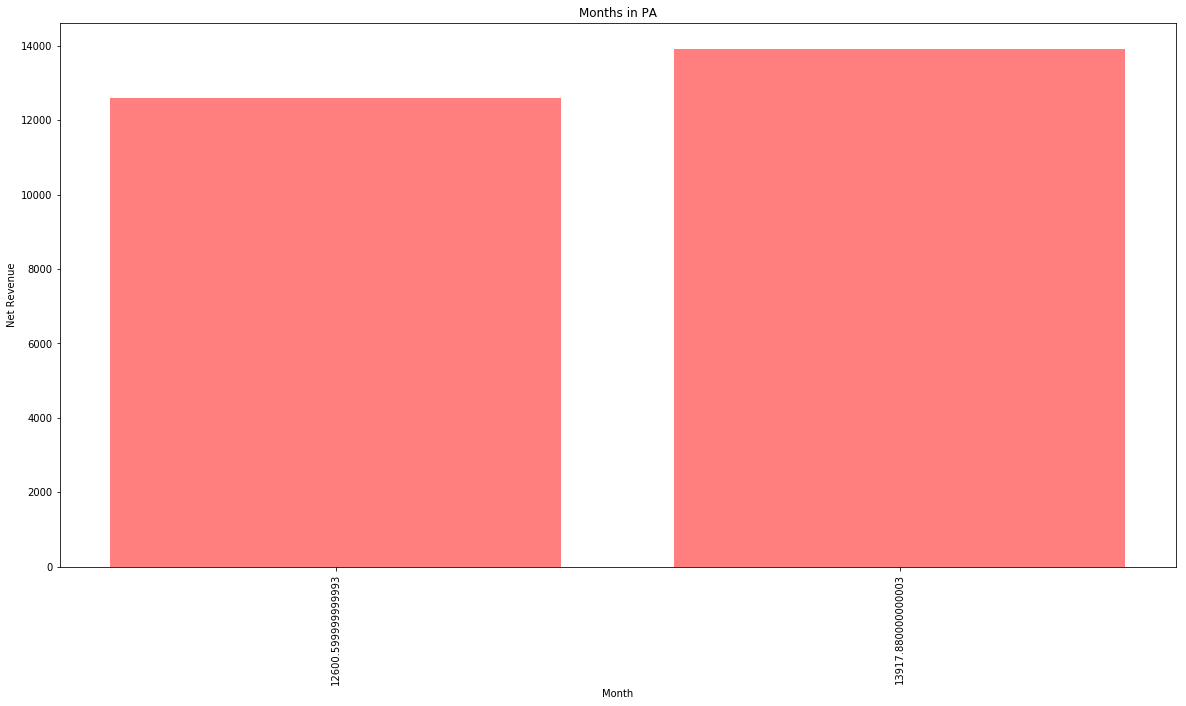

In [67]:
plt.figure(figsize=(20,10))
plt.bar(x_axis, groupNet, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, countgroup, rotation="vertical")

plt.title("Months in PA")
plt.xlabel("Month")
plt.ylabel("Net Revenue")
#plt.tight_layout()
plt.savefig("PAMonthlyRev.png")
plt.show()

In [ ]:
file_df["ACTUAL SALES VOLUME"].max()

In [ ]:
belmar_df = file_df.loc[file_df["CITY"] == "Belmar",:]

In [ ]:
belmar_new_df = belmar_df[["COMPANY NAME","CITY","LOCATION ADDRESS", "LAST NAME", "FIRST NAME","PHONE NUMBER", "SALES VOLUME RANGE","ACTUAL SALES VOLUME"]]

In [ ]:
belmar_new_df

In [ ]:
squan_df = file_df.loc[file_df["CITY"] == "Manasquan",:]

In [ ]:
squan_new_df = squan_df[["COMPANY NAME","CITY","LOCATION ADDRESS", "LAST NAME", "FIRST NAME","PHONE NUMBER", "SALES VOLUME RANGE","ACTUAL SALES VOLUME"]]

In [ ]:
squan_new_df.nunique()

In [ ]:
belmar_new_df.nunique()

In [ ]:
squan_new_df

In [ ]:
WLB_df = file_df.loc[file_df["CITY"] == "West Long Branch",:]

In [ ]:
WLB_new_df = WLB_df[["COMPANY NAME","CITY","LOCATION ADDRESS", "LAST NAME", "FIRST NAME","PHONE NUMBER", "SALES VOLUME RANGE","ACTUAL SALES VOLUME"]]

In [ ]:
WLB_new_df.nunique()

In [ ]:
WLB_new_df

In [ ]:
eatontown_df = file_df.loc[file_df["CITY"] == "Eatontown",:]

In [ ]:
eatontown_new_df = eatontown_df[["COMPANY NAME","CITY","LOCATION ADDRESS", "LAST NAME", "FIRST NAME","PHONE NUMBER", "SALES VOLUME RANGE","ACTUAL SALES VOLUME"]]

In [ ]:
eatontown_new_df.nunique()

In [ ]:
eatontown_new_df

In [ ]:
rb_df = file_df.loc[file_df["CITY"] == "Red Bank",:]

In [ ]:
rb_new_df = rb_df[["COMPANY NAME","CITY","LOCATION ADDRESS", "LAST NAME", "FIRST NAME","PHONE NUMBER", "SALES VOLUME RANGE","ACTUAL SALES VOLUME"]]

In [ ]:
rb_new_df.count()

In [ ]:
rb_new_df

In [ ]:
groupedbystatus = file_df.groupby(["CITY"])
groupedbystatus.sum()

In [ ]:
#groupedbystatus["CITY"].count()
citycountSIC = groupedbystatus["CITY"].count()
citycountSIC

In [ ]:
cityuniSIC = groupedbystatus["CITY"].unique()
cityuniSIC

In [ ]:
citymaxSIC = groupedbystatus["CITY"].count().max()
citymaxSIC

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
x_axis = np.arange(len(cityarray))
tick_locations = [value for value in x_axis]

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(x_axis, citycountSIC, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, cityuniSIC, rotation="vertical")

plt.title("Cities in County")
plt.xlabel("City")
plt.ylabel("Count of SIC In County")
#plt.tight_layout()
plt.savefig("avgfiltafranchisecounty.png")
plt.show()

In [ ]:
#cityarray

In [ ]:
file_df["ACTUAL SALES VOLUME"]

In [ ]:
sales = groupedbystatus["ACTUAL SALES VOLUME"].sum()
salesadj = sales/100

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(x_axis, salesadj, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, cityuniSIC, rotation="vertical")

plt.title("Cities in County")
plt.xlabel("City")
plt.ylabel("Count of Sales Reported In County")
#plt.tight_layout()
plt.savefig("avgfiltasalescounty.png")
plt.show()

In [ ]:
Freeholdcity= file_df.loc[file_df["CITY"] == "Freehold", :]
Totalcity = file_df["CITY"].count()

#Freeholdpercent = Freeholdcity/Totalcity
#Other = (1-Freeholdpercent)

In [ ]:
Freeholdcount = Freeholdcity["CITY"].count()
Freeholdcount

In [ ]:
TCADJ = Totalcity - 150 

In [ ]:
Freeholdpercent = Freeholdcount/TCADJ
Other = (1-Freeholdpercent)

In [ ]:
types = ["Freeholdpercent", "Other"]
percents = [Freeholdpercent, Other]
colors = ["Blue", "Green"]
explode = (0.1, 0)

plt.title("% of Freehold vs rest of county")
plt.pie(percents, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
#plt.axis("equal")
plt.savefig("Freeholdpie.png")
plt.show()